<h5>ML 101 Case Scenario </h5>
<p>You are a researcher at a prestigious botanical institute tasked with developing a cutting-edge system for automated iris classification. The institute aims to streamline the process of identifying iris species for their ongoing research projects and conservation efforts.
To achieve this goal, you have been provided with the Iris dataset, which contains detailed measurements of iris flowers' sepal and petal dimensions, along with their corresponding species labels.
Your task is to leverage your expertise in machine learning to construct a robust classification model. This model will serve as the backbone of an automated system capable of accurately identifying iris species based solely on their physical characteristics.
The success of this project holds significant implications for the institute's research efficiency and environmental conservation initiatives. By accurately classifying iris species, the institute can better understand their distribution patterns, ecological roles, and potential threats, ultimately contributing to the broader scientific community's understanding of biodiversity and ecosystem dynamics.</p>

In [1]:
#let's import all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
d = pd.read_csv(r"C:\Users\Loretta\Desktop\ML_Work\Iris.csv")
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#to see the column items
d.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
#checking out the items at the bottom
d.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#let's know the datatypes of each column
d.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
#checking if there are empty values
d.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#since Id column is just a serial no & does not affect the data in anyway.. we remove it from the dataset
d.drop("Id", axis = 1, inplace = True)

In [8]:
d.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
80,5.5,2.4,3.8,1.1,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica


<p>Since the aim of this project is to predict what a specie of flower is, this "Species" in this context is the Target or Label, let's check for the number of the class of target we are trying to predict </p>

In [9]:
d.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<p>This is an e.g of a Multi-Classification type of supervised learning because we're trying to predict more than 2 distinct items that's not continous, let's count the unique value of each specie because our label must have equal amount of information to avoid biased output</p>

In [10]:
d.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<p>Using descriptive statistics, let's know the distribution of our dataset</p>


In [11]:
d.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>Data Visualization</h3>

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

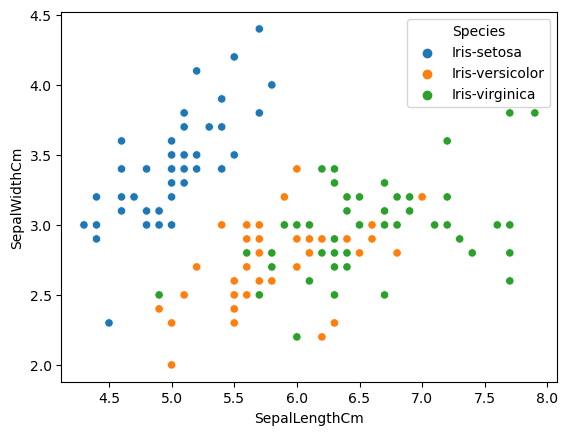

In [12]:
sns.scatterplot(data = d, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

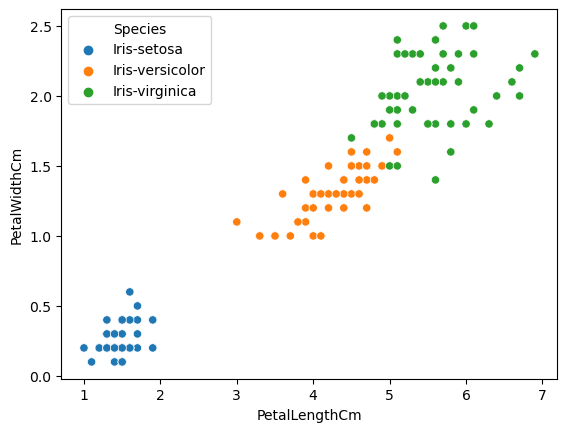

In [13]:
sns.scatterplot(data = d, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species')

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

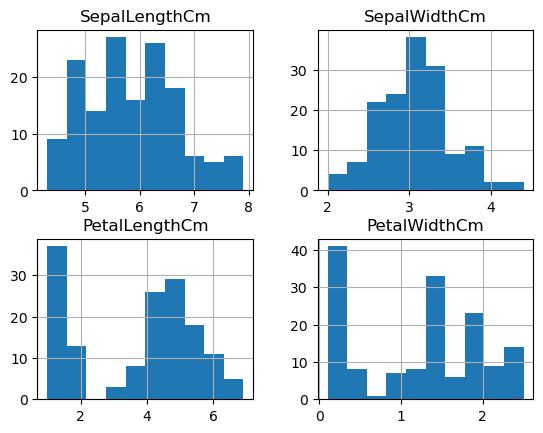

In [17]:
d.hist()

<h3>Data Encoding</h3>
<p>Most algorithms can't handle text, so it's best to encode your text into numerical values. We'll utilize Label Encoder to encode the Species.

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit_transform(d.Species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
d.Species = le.fit_transform(d.Species)

In [21]:
d.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
137,6.4,3.1,5.5,1.8,2
47,4.6,3.2,1.4,0.2,0
101,5.8,2.7,5.1,1.9,2


In [22]:
d.Species.unique()

array([0, 1, 2])

In [23]:
d.corr('pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<p>We usually use a heatmap to visualize correlation; the dark places show weak correlation & vice versa</p>


<Axes: >

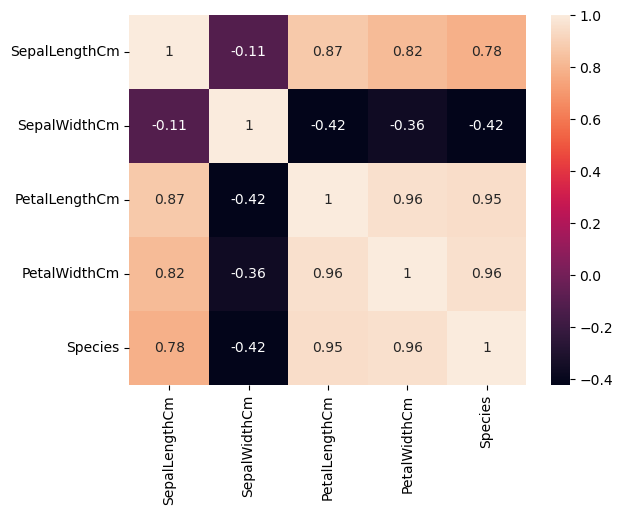

In [24]:
sns.heatmap(d.corr('pearson').round(2), annot = True)

<p> We would have eliminated the weak ones if we have plenty columns but in this case, it has lesser columns</p>

<h3>Data Splitting</h3>

In [25]:
#let's define our features(x) and target(y)
x = d.iloc[:, :4]
y = d.Species
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [27]:
#to split our dataset, we get the attribute
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, shuffle = True, random_state = 42)

In [29]:
print(f"The shape of our x_train set is : {x_train.shape}")
print(f"The shape of our x_test set is : {x_test.shape}")
print(f"The shape of our y_train set is : {y_train.shape}")
print(f"The shape of our y_test set is : {y_test.shape}")

The shape of our x_train set is : (105, 4)
The shape of our x_test set is : (45, 4)
The shape of our y_train set is : (105,)
The shape of our y_test set is : (45,)


In [34]:
#importing naive_bayes & KNN algorithmns to individually train our data and identify the best fit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
nb = GaussianNB()

In [35]:
#let's train the dataset by fitting the algorithm
nb.fit(x_train, y_train)
nb.score(x_train, y_train).round(2)*100

94.0

In [49]:
knn.fit(x_train, y_train)
knn.score(x_train, y_train).round(2)*100

95.0

In [33]:
print(f"The accuracy score on our training dataset using nb is : {nb.score(x_train, y_train).round(2)*100}")
print(f"The accuracy score on our training dataset using knn is : {knn.score(x_train, y_train).round(2)*100}")

The accuracy score on our training dataset using nb is : 94.0
The accuracy score on our training dataset using knn is : 95.0


<p>let's test our algorithm and make our prediction(y_pred), first we import all the metrics we need to evaluate the accuracy of the test</p>

In [42]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score,ConfusionMatrixDisplay

In [45]:
le = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
le

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

98.0


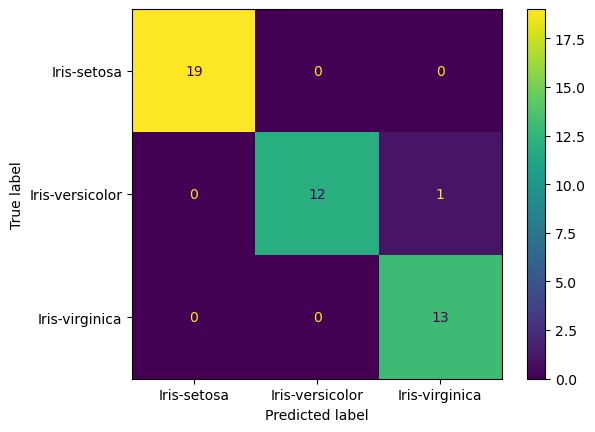

In [47]:
print (accuracy_score(y_test, nb.predict(x_test)).round(2)*100)
confusion_matrix(y_test, nb.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix(y_test, nb.predict(x_test)), display_labels= le).plot()

<p>Using naive_bayes, we have 19 Iris-setosa that was predicted as Iris-setosa, 12 Iris-versicolor that was predicted as Iris-versicolor and 13 Iris-virginica that was predicted as Iris-virginica; only one Iris-versicolor was predicted as Iris-virginica.. A total of 98% was predicted correctly </p>

100.0


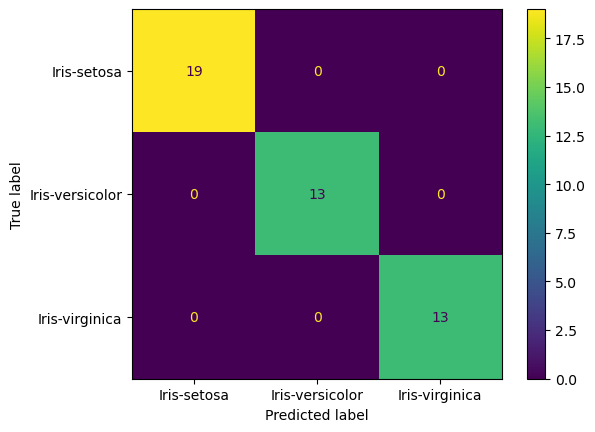

In [51]:
print (accuracy_score(y_test, knn.predict(x_test)).round(2)*100)
confusion_matrix(y_test, knn.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(x_test)), display_labels= le).plot()

<p>Our KNN algorithm was able to predict the dataset 100% correctly</p>